In [0]:
import numpy as np

from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from keras.layers import LeakyReLU

import matplotlib.pyplot as plt
%matplotlib inline  

from random import shuffle

In [0]:
def loadData(file):
    """ Load the high energy data.
    
    Args:
        file: File address where the data will be obtained.

    Returns:
        (X, Y), arrays such that
        * X: They are the 5-tuples of data.
        * Y: Classification corresponding to each 5-tuple of X. """

    # Load the data from the file and separate it into training and testing.
    b = np.load(file, allow_pickle=True)
    x_train = b['training_input'].tolist()
    x_test = b['test_input'].tolist()

    # Separate the event and background signals.
    x_train0 = x_train['0'].tolist()
    x_train1 = x_train['1'].tolist()
    x_test0 = x_test['0'].tolist()
    x_test1 = x_test['1'].tolist()

    # Add to each tuple the corresponding classification.
    for i in range(50):
      x_train0[i].append(0)
      x_train1[i].append(1)
      x_test0[i].append(0)
      x_test1[i].append(1)

    for i in range(len(x_test0)): 
      x_train0.append(x_test0.pop(0))

    for i in range(len(x_test1)): 
      x_train1.append(x_test1.pop(0))

    x_train0.extend(x_train1)

    # Create the arrays whose elements will be the corresponding 
    # classification of each tuple in X_train and X_test
    y_train = []
    for x in x_train0:
      y_train.append(x.pop())

    return (x_train0, y_train)

In [0]:
def makeModel():
    """ We generate the structure of the neural network.

    Returns: 
        Neural network with 2 hidden layers of 32 and 16 neurons respectively."""

    model = Sequential()

    # Because the input is small (5), a neural network with several layers 
    # of few neurons is preferable than few layers of many neurons.
    # I use the "Leaky ReLU" activation function instead of "ReLU" because 
    # the input can be negative.
    model.add(Dense(64, input_shape=(5,)))
    model.add(LeakyReLU(alpha=1))

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=1))

    model.add(Dense(16))
    model.add(LeakyReLU(alpha=1))

    model.add(Dense(8))
    model.add(LeakyReLU(alpha=1))

    # In the end we use the "sigmoid" activation function due to its simple 
    # derivative, which reduces the computation.
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

In [0]:
def train(model, X_train, Y_train, X_test, Y_test):
    """ Train the neural network.

    Args:
        model: Neural network.
        X_train: They are the 5-tuples of data to train.
        Y_train: Classification corresponding to each 5-tuple of X_train. 
          0 for background and 1 for signals events. 
        X_test: They are the 5-tuples of data to test.
        Y_test: Classification corresponding to each 5-tuple of X_test. 
          0 for background and 1 for signals events. 

    Returns:
        history: Training history."""

    # All parameters were chosen in a practical way
    op = optimizers.Adam(lr=0.00001, beta_1=0.99, beta_2=0.01)

    # Compiling the sequential model
    model.compile(loss='binary_crossentropy', 
                  metrics=['accuracy'], 
                  optimizer=op)

    # Training the model and saving metrics in history
    history = model.fit(X_train, Y_train,
              batch_size=15, epochs=50,
              verbose=0, shuffle=True,
              validation_data=(X_test, Y_test))
    
    return history

In [0]:
def showData(file):
    """ Graph the High Energy Data, separating the 5-tuples corresponding to 
    background data (blue), from those corresponding to signals (red). Each 
    line is a 5-tuple. It can be noted that each 5-tuple can be classified 
    (regardless of whether it is background or signal) in 4 classes, which 
    present very similar data. Therefore, for better understanding of the 
    graphics, the graphics were separated into 4 as well. 
    
    Args:
        file: File address where the data will be obtained.
        """

    # Load the data from the file and separate it into training and testing.
    b = np.load(file, allow_pickle=True)
    x_train = b['training_input'].tolist()
    x_test = b['test_input'].tolist()

    # Separate the event and background signals.
    x_train0 = x_train['0'].tolist()
    x_train1 = x_train['1'].tolist()
    x_test0 = x_test['0'].tolist()
    x_test1 = x_test['1'].tolist()
    x_train0.extend(x_test0)
    x_train1.extend(x_test1)

    fig = plt.figure(figsize = (10,10))

    # CLASS 1
    class1 = 0
    plt.subplot(4,2,1)
    for i in range(len(x_train0)):
      if 0.75 <= x_train0[i][0] <= 1:
        class1 += 1
        plt.title('BACKGROUND')
        plt.plot([1,2,3,4,5], x_train0[i], 'c')

    plt.subplot(4,2,2)
    for i in range(len(x_train0)):
      if 0.75 <= x_train1[i][0] <= 1:
        class1 += 1
        plt.title('SIGNALS')
        plt.plot([1,2,3,4,5], x_train1[i], 'r')

    # CLASS 2
    class2 = 0
    plt.subplot(4,2,3)
    for i in range(len(x_train0)):
      if 0.25 <= x_train0[i][0] <= 0.5:
        class2 += 1
        plt.plot([1,2,3,4,5], x_train0[i], 'c')

    plt.subplot(4,2,4)
    for i in range(len(x_train0)):
      if 0.25 <= x_train1[i][0] <= 0.5:
        class2 += 1
        plt.plot([1,2,3,4,5], x_train1[i], 'r')

    # CLASS 3
    class3 = 0
    plt.subplot(4,2,5)
    for i in range(len(x_train0)):
      if -0.5 <= x_train0[i][0] <= -0.25:
        class3 += 1
        plt.plot([1,2,3,4,5], x_train0[i], 'c')

    plt.subplot(4,2,6)
    for i in range(len(x_train0)):
      if -0.5 <= x_train1[i][0] <= -0.25:
        class3 += 1
        plt.plot([1,2,3,4,5], x_train1[i], 'r')

    # CLASS 4
    class4 = 0
    plt.subplot(4,2,7)
    for i in range(len(x_train0)):
      if -0.9 >= x_train0[i][0]:
        class4 += 1
        plt.plot([1,2,3,4,5], x_train0[i], 'c')

    plt.subplot(4,2,8)
    for i in range(len(x_train0)):
      if -0.9 >= x_train1[i][0]:
        class4 += 1
        plt.plot([1,2,3,4,5], x_train1[i], 'r')

    print("CLASS 1: ", class1)
    print("CLASS 2: ", class2)
    print("CLASS 3: ", class3)
    print("CLASS 4: ", class4)

In [0]:
def train_test(X, Y, i, j):
    """ Take two sets and partition them into blocks of 200 elements. 
    Then a partition of the two original sets of two blocks returns, 
    one with 160 elements and the other with 40, such that the position 
    of the elements in both sets coincide.
    
    Args:
        X: Set 1.
        Y: Set 2.
        i, j: They indicate which partition will be used, its value is 0 <= i, j < 5.
        
    Returns:
        (X_train, Y_train, X_test, Y_test) such that
         * {X_train, X_test} is a partition of X
         * |X_train| = 160, |X_test| = 40
         * {Y_train, Y_test} is a partition of Y
         * |Y_train| = 160, |Y_test| = 40
         * if X[i] in X_train then Y[i] in Y_train
         * if X[i] in X_test then Y[i] in Y_test"""

    # Partition of X.
    X0_p = [X[i*20: (i+1)*20] for i in range(5)]
    X1_p = [X[100 + i*20: 100 + (i+1)*20] for i in range(5)]
    # Partition of Y.
    Y0_p = [Y[i*20: (i+1)*20] for i in range(5)]
    Y1_p = [Y[100 + i*20: 100 + (i+1)*20] for i in range(5)]

    range0 = [0, 1, 2, 3 ,4]
    range0.pop(i)
    range1 = [0, 1, 2, 3 ,4]
    range1.pop(j)

    X_train = []
    Y_train = []
    for i in range0:
      X_train.extend(X0_p[i])
      Y_train.extend(Y0_p[i])
    for i in range1:
      X_train.extend(X1_p[i])
      Y_train.extend(Y1_p[i])

    X_test = X0_p[i]; X_test.extend(X1_p[j])
    Y_test = Y0_p[i]; Y_test.extend(Y1_p[j])

    return (X_train, Y_train, X_test, Y_test)

In [0]:
def plot_history(history):
    # We plot the training history. In general, an accuracy of around 70% is obtained.
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['acc'], 'c')
    plt.plot(history.history['val_acc'], 'r')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], 'c')
    plt.plot(history.history['val_loss'], 'r')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

    plt.tight_layout()

    print("Max acc: ", max(history.history['val_acc']))
    print("Min loss: ", min(history.history['val_loss']))

Max acc:  0.7750000059604645
Min loss:  0.5320956148207188


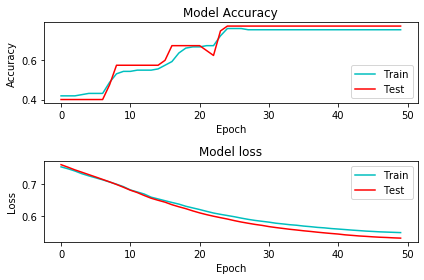

In [296]:
# We obtain the data.
(X, Y) = loadData('/content/QIS_EXAM_200Events.npz')
model = makeModel()

# Separate the data according to partition 0, 4 (experimentally chosen).
(X_train, Y_train, X_test, Y_test) = train_test(X, Y, 0, 4)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# We train and graph the result
h = train(model, X_train, Y_train, X_test, Y_test)

# In general, an accuracy of approximately 0.78 is obtained, 
# with a maximum of about 0.8
plot_history(h)


CLASS 1:  46
CLASS 2:  41
CLASS 3:  60
CLASS 4:  53


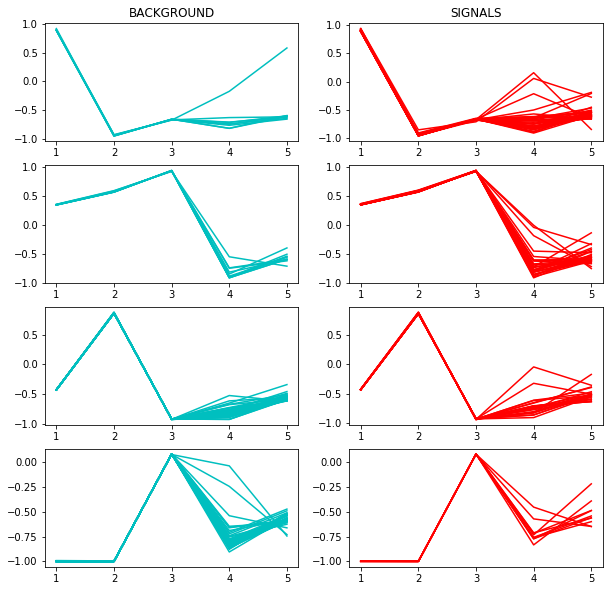

In [273]:
# Thanks to the data graphics, it can be noted that the data are very 
# similar regardless of whether they are signals or background, 
# which makes it difficult for the neural network to distinguish them.
showData('/content/QIS_EXAM_200Events.npz')